In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df.shape

(396030, 27)

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.isnull().sum().sort_values(ascending=False)


mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
installment                 0
int_rate                    0
term                        0
grade                       0
loan_amnt                   0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
dti                         0
issue_d                     0
loan_status                 0
purpose                     0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
revol_bal                   0
initial_list_status         0
total_acc                   0
application_type            0
address                     0
dtype: int64

In [8]:
df = df.drop([
    'emp_title',
    'title',
    'address'   # high-cardinality text
], axis=1)


In [10]:
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
297216,35000.0,36 months,9.91,1127.88,B,B1,2 years,OWN,600000.0,Source Verified,...,May-1975,7.0,0.0,0.0,0.0,11.0,f,INDIVIDUAL,NaN,0.0
287026,17550.0,36 months,9.49,562.10,B,B2,1 year,MORTGAGE,80000.0,Not Verified,...,Jul-1998,18.0,0.0,28655.0,47.5,36.0,f,INDIVIDUAL,3.0,0.0
7743,10000.0,36 months,6.89,308.27,A,A3,9 years,MORTGAGE,90000.0,Not Verified,...,Jul-2005,16.0,0.0,22357.0,76.8,27.0,f,INDIVIDUAL,1.0,0.0
13383,13000.0,36 months,16.99,463.43,D,D3,< 1 year,RENT,52263.0,Verified,...,Feb-2004,9.0,0.0,10825.0,75.2,30.0,w,INDIVIDUAL,0.0,0.0
328009,9000.0,36 months,6.03,273.92,A,A1,5 years,RENT,91000.0,Verified,...,Apr-2005,10.0,0.0,3092.0,9.7,24.0,f,INDIVIDUAL,0.0,0.0


In [13]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

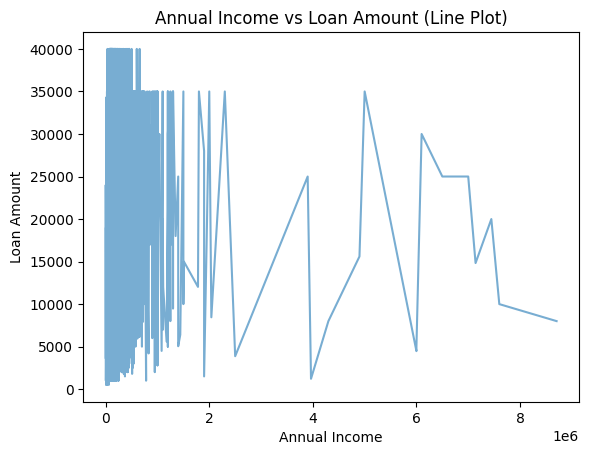

In [16]:
import matplotlib.pyplot as plt

# Sort by income so line plot is meaningful
df_line = df.sort_values('annual_inc')

plt.figure()

plt.plot(
    df_line['annual_inc'],
    df_line['loan_amnt'],
    alpha=0.6
)

plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount (Line Plot)')
plt.show()



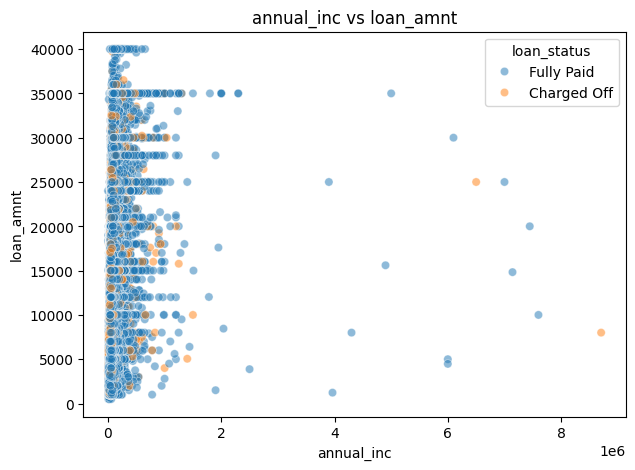

In [18]:

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='annual_inc',
    y='loan_amnt',
    hue='loan_status',
    alpha=0.5
)
plt.title('annual_inc vs loan_amnt')
plt.show()